# Terrain Motion Displacement - Flat 10cm (Scaled - Exhaustive) - Scores

## 1) IPython Setup

In [10]:
%%javascript
/* 
 * Force prevention of output scroll toggle.
 * Original source: https://github.com/ipython/ipython/issues/2172#issuecomment-53708976 
 */
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [11]:
%load_ext ipycache
%matplotlib inline

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['figure.figsize'] = (12, 8)

# We have to add a reference to the parent folder in order to access the modules.
import sys,os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import main as templ
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tse.tse_matchmethod import tse_match_methods
from tse.tse_matchtype import TSEMatchType
from tse.tse_datautils import TSEDataUtils

The ipycache extension is already loaded. To reload it, use:
  %reload_ext ipycache


## 2) Calculate Displacement 

In [12]:
# %%cache -d cache/ cache_flat_10cm_scaled_exhaustive_scores.pkl results_dict

config_file = "../../perspective_calibration/data/calibdata2.txt"

image_pairs = [
                ("../../eval_data/img1.jpg", "../../eval_data/img2.jpg")
              ]

patch_sizes = [100]

match_method1 = TSEMatchType("DistanceEuclidean", tse_match_methods.DISTANCE_ED, None, "r", reverse_score=True)
# match_method2 = TSEMatchType("HistCorrel", tse_match_methods.HIST, cv2.cv.CV_COMP_CORREL, "b")
# match_method3 = TSEMatchType("HistChiSqr", tse_match_methods.HIST, cv2.cv.CV_COMP_CHISQR, "g", reverse_score=True)
# match_method4 = TSEMatchType("DistanceCorr", tse_match_methods.DISTANCE, cv2.cv.CV_TM_CCORR_NORMED, "y")

match_methods = [match_method1]

results_dict = templ.start_tests(image_pairs, patch_sizes, match_methods, config_file, exhaustive_search=True, use_scaling=True, scale_centre=False, use_hsv=False, strip_luminance=False, plot_results=False)

## 3) Tests

### Test 1: IMG1/IMG2 - 50px patch - *DistanceEuclidean*, *DistanceCorr*, *HistCorrel*, *HistChiSqr*

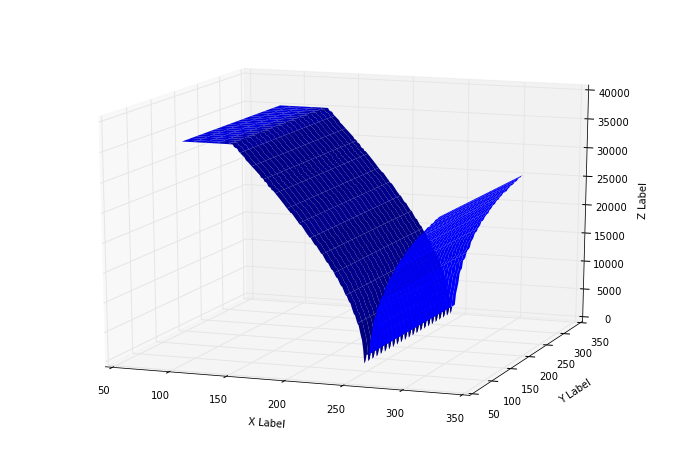

In [40]:
from matplotlib import cm

results_pair1_100 = results_dict['img1.jpg_img2.jpg'][100]

final_results = {}
format_ids = ["b", "g", "r", "y"]

for method in results_pair1_100:
        
    if method not in final_results:
        final_results[method] = {}

    data = results_pair1_100[method]

    final_results[method]['displacement'] = [result.displacement for result in data]

    final_results[method]['row'] = [result.row for result in data]
    
    final_results[method]['match_scores'] = [result.match_scores for result in data]


# print final_results['DistanceEuclidean']['match_scores']

# print final_results['DistanceEuclidean']['row']
# print final_results['DistanceEuclidean']['match_scores'][0]

scores = [result[0] for result in final_results['DistanceEuclidean']['match_scores'][0]]
rows = [result[1] for result in final_results['DistanceEuclidean']['match_scores'][0]]

# print scores
# print rows

# plt.plot(np.array(rows), np.array(scores), "{0}-".format('b'), label=result)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(rows, rows)
# zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = scores

ax.plot_surface(X, Y, Z, linewidth=0)
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', linewidth=0, antialiased=False)

# fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=15, azim=290)

plt.show()
    
# for i, result in enumerate(final_results):
    
#     final_results[result]['cma'] = TSEDataUtils.calc_centered_moving_average(np.array(final_results[result]['displacement']), 10)
    
#     plt.plot(np.array(final_results[result]['row']), np.array(final_results[result]['displacement']), "{0}.".format(format_ids[i]), label=result)
    
#     plt.plot(final_results[result]['row'][len(final_results[result]['row']) - len(final_results[result]['cma']):], final_results[result]['cma'], "{0}-".format(format_ids[i]), label="{0}_CMA".format(result))                                                 

# plt.title('Vertical Motion Displacement - IMG1/IMG2 - 50px patch height')
# plt.xlabel('Image Row Height (px)')
# plt.ylabel('Vertical Displacement (px)')
# plt.legend(loc='upper left')
# plt.show()